<a href="https://colab.research.google.com/github/BelanVaidehee/BMLpracticals/blob/main/Experiment9bml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart (1).csv to heart (1).csv


In [ ]:
file_name = next(iter(uploaded))
print("Loaded file:", file_name)

df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print("\nFirst 5 rows of data:")
print(df.head())

print("\nColumns in dataset:")
print(df.columns)


Loaded file: heart (1).csv

First 5 rows of data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Columns in dataset:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
df_features = df.copy()

if 'target' in df_features.columns:
    df_features = df_features.drop(columns=['target'])
    print("\n'Dropped target column for clustering (unsupervised).'")

# Keep only numeric columns (K-means needs numeric data)
df_features = df_features.select_dtypes(include=[np.number])

print("\nUsing these numeric columns for clustering:")
print(df_features.columns)


'Dropped target column for clustering (unsupervised).'

Using these numeric columns for clustering:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [ ]:
df_features = df_features.dropna()

print("\nShape of feature data after dropping NaNs:", df_features.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)


Shape of feature data after dropping NaNs: (1025, 13)


In [ ]:
inertia_values = []
k_values = range(1, 11)  # trying k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)


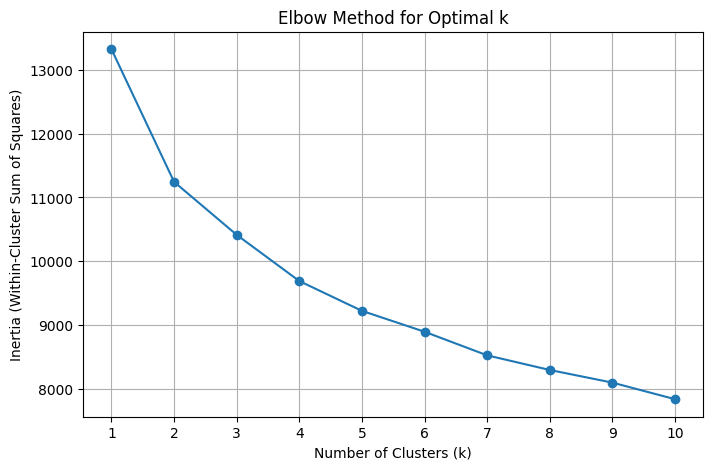

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.xticks(k_values)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


In [ ]:
print("\nFrom the elbow graph above, choose a reasonable k (e.g., 3, 4, 5).")

# 7. Build final K-means model with chosen k
#    You can change this value after seeing the elbow plot.
chosen_k = 4   # <--- CHANGE THIS if you want another k
print(f"\nBuilding final KMeans model with k = {chosen_k}")

kmeans_final = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)


From the elbow graph above, choose a reasonable k (e.g., 3, 4, 5).

Building final KMeans model with k = 4


In [ ]:
df['Cluster'] = clusters

print("\nCluster counts:")
print(df['Cluster'].value_counts())

print("\nFirst 10 rows with cluster labels:")
print(df.head(10))



Cluster counts:
Cluster
2    371
0    296
3    224
1    134
Name: count, dtype: int64

First 10 rows with cluster labels:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      

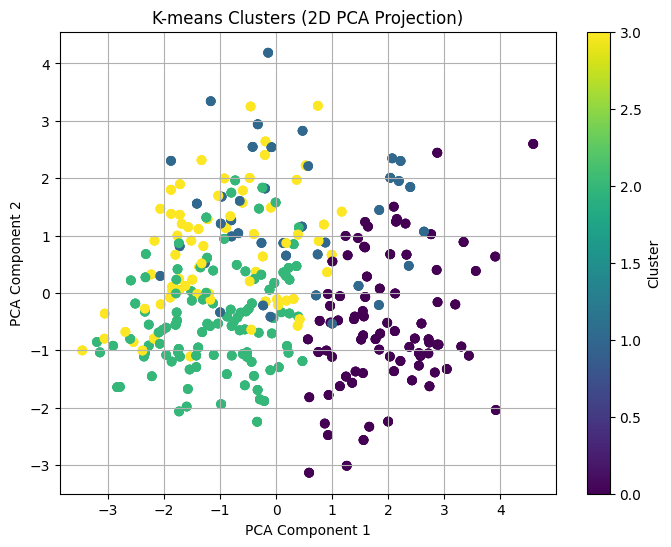

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-means Clusters (2D PCA Projection)")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
centers_scaled = kmeans_final.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers_original, columns=df_features.columns)
centers_df.index.name = 'Cluster'
print("\nApproximate cluster centers (in original feature scales):")
print(centers_df)


Approximate cluster centers (in original feature scales):
               age           sex        cp    trestbps        chol  \
Cluster                                                              
0        57.719595  8.175676e-01  0.155405  133.858108  255.966216   
1        57.910448  7.462687e-01  1.276119  138.716418  246.970149   
2        50.506739  1.000000e+00  1.285714  128.469003  233.811321   
3        54.517857  3.330669e-15  1.214286  129.598214  252.437500   

                  fbs   restecg     thalach     exang   oldpeak     slope  \
Cluster                                                                     
0        5.405405e-02  0.439189  128.101351  0.746622  2.099324  0.929054   
1        1.000000e+00  0.432836  150.477612  0.328358  0.908955  1.402985   
2        8.086253e-03  0.587601  162.199461  0.134771  0.623989  1.663073   
3        2.498002e-16  0.611607  154.392857  0.133929  0.551786  1.517857   

               ca      thal  
Cluster                    